In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

from matplotlib import rc # 폰트
# 유니코드 폰트 설정
rc('font', family='AppleGothic')
# 마이너스 기호 표시 설정
plt.rcParams['axes.unicode_minus'] = False

# A05 의약품가격

In [2]:
A05 = pd.read_excel('A05 2010-2022.xlsx')
A05

,Category,사용금액
0,201001,56398887
1,201002,54440020
2,201003,57782217
3,201004,55537175
4,201005,49199325
...,...,...
151,202208,42918408
152,202209,27768210
153,202210,23261359
154,202211,29610163


In [6]:
A05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Category  156 non-null    int64
 1   사용금액      156 non-null    int64
dtypes: int64(2)
memory usage: 2.6 KB


In [9]:
# 'Category' 컬럼의 값을 'yyyy-mm-01' 형식으로 변환
A05['Category'] = pd.to_datetime(A05['Category'], format='%Y%m').dt.strftime('%Y-%m-%d')
A05

,Category,사용금액
0,2010-01-01,56398887
1,2010-02-01,54440020
2,2010-03-01,57782217
3,2010-04-01,55537175
4,2010-05-01,49199325
...,...,...
151,2022-08-01,42918408
152,2022-09-01,27768210
153,2022-10-01,23261359
154,2022-11-01,29610163


In [10]:
A05.columns = ['Date', 'Amount_used']
A05

,Date,Amount_used
0,2010-01-01,56398887
1,2010-02-01,54440020
2,2010-03-01,57782217
3,2010-04-01,55537175
4,2010-05-01,49199325
...,...,...
151,2022-08-01,42918408
152,2022-09-01,27768210
153,2022-10-01,23261359
154,2022-11-01,29610163


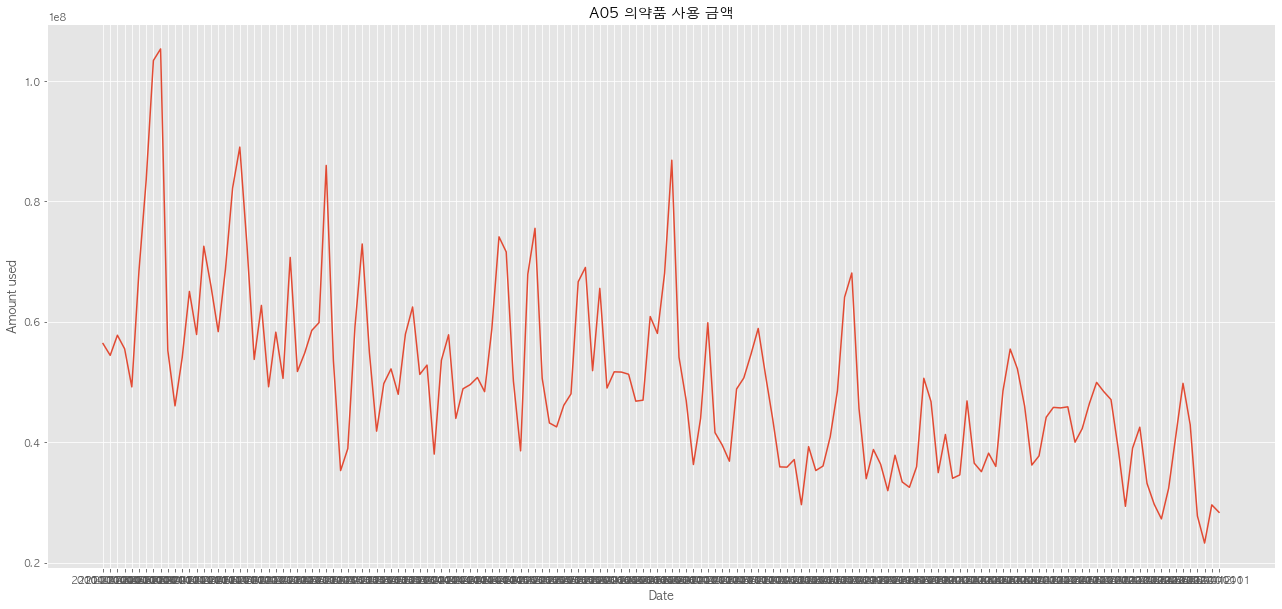

In [54]:
plt.figure(figsize=(22,10))
plt.plot(A05.Date, A05.Amount_used)
plt.title("A05 의약품 사용 금액")
plt.xlabel("Date")
plt.ylabel("Amount used")
plt.show()

In [55]:
timeSeries = A05.loc[:, ["Date", "Amount_used"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date", axis=1)
ts

,Amount_used
Date,
2010-01-01,56398887
2010-02-01,54440020
2010-03-01,57782217
2010-04-01,55537175
2010-05-01,49199325
...,...
2022-08-01,42918408
2022-09-01,27768210
2022-10-01,23261359


<Figure size 432x288 with 0 Axes>

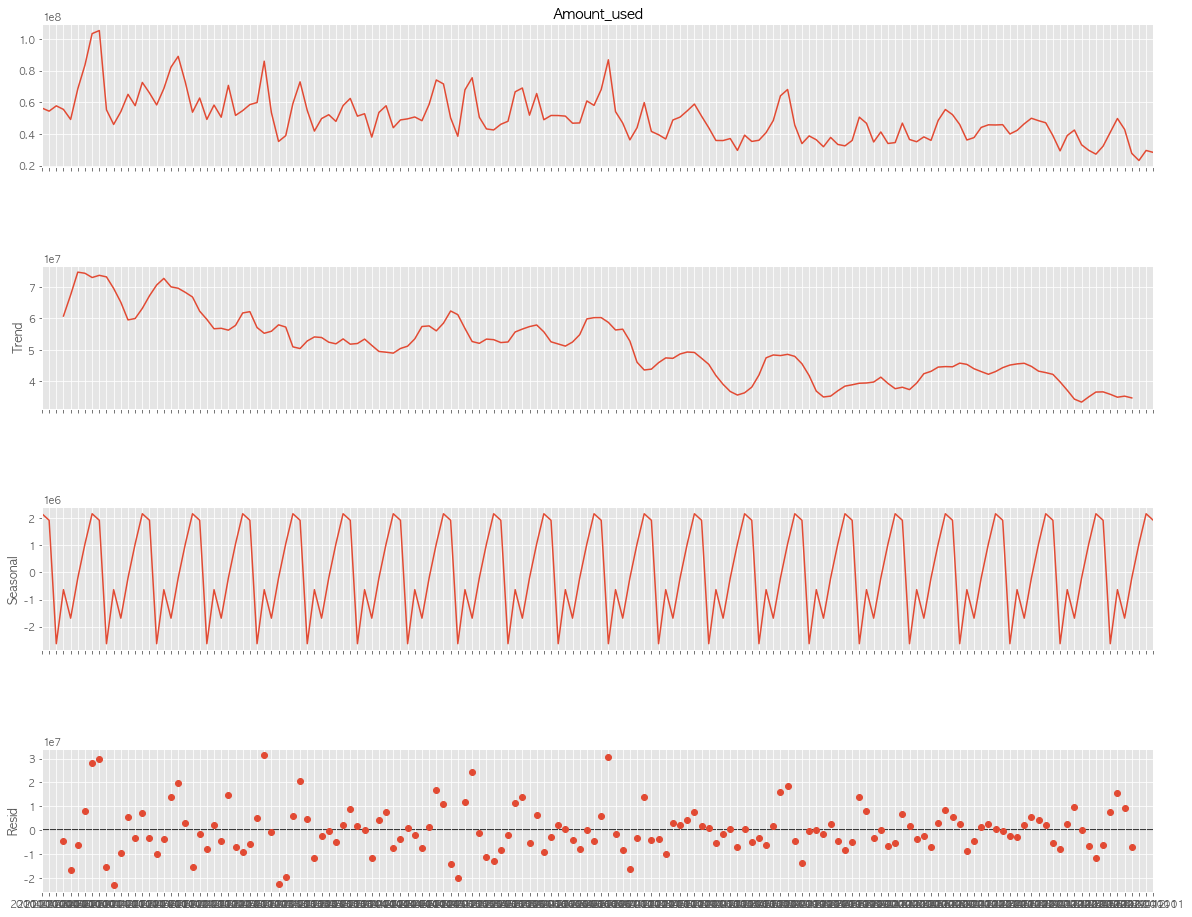

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['Amount_used'], model = 'additive', period = 7)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20, 15)

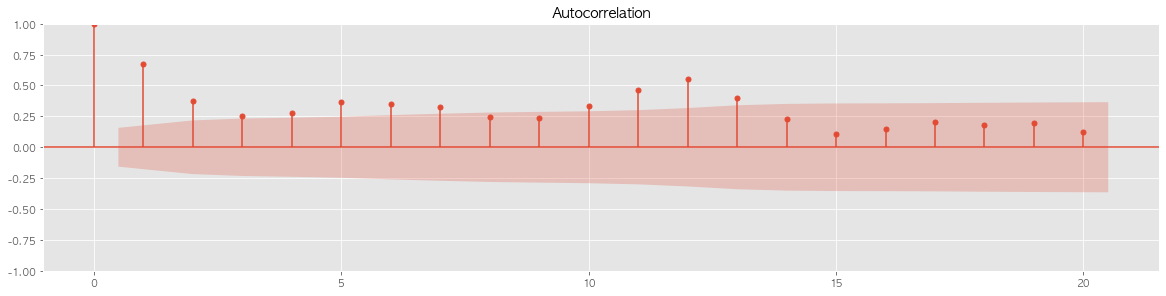

In [57]:
# ACF 그래프

import statsmodels.api as sm

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)

In [58]:
# ADF 검정으로 정상성 확인

from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.221027
p-value: 0.664486
Critical Values
	1%: -3.478
	5%: -2.882
	10%: -2.578


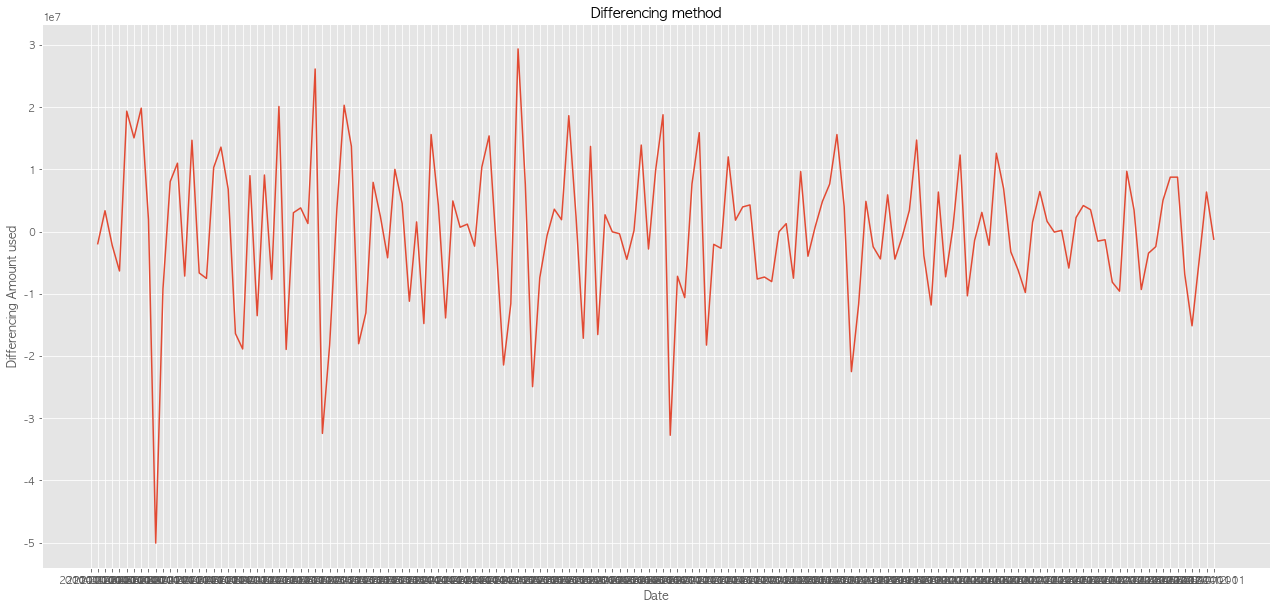

In [59]:
# 1차 차분

ts_diff = ts - ts.shift()
plt.figure(figsize=(22, 10))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Amount used")
plt.show()

In [60]:
# ADF 검정으로 정상성 확인

result = adfuller(ts_diff[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.286368
p-value: 0.000469
Critical Values
	1%: -3.478
	5%: -2.882
	10%: -2.578


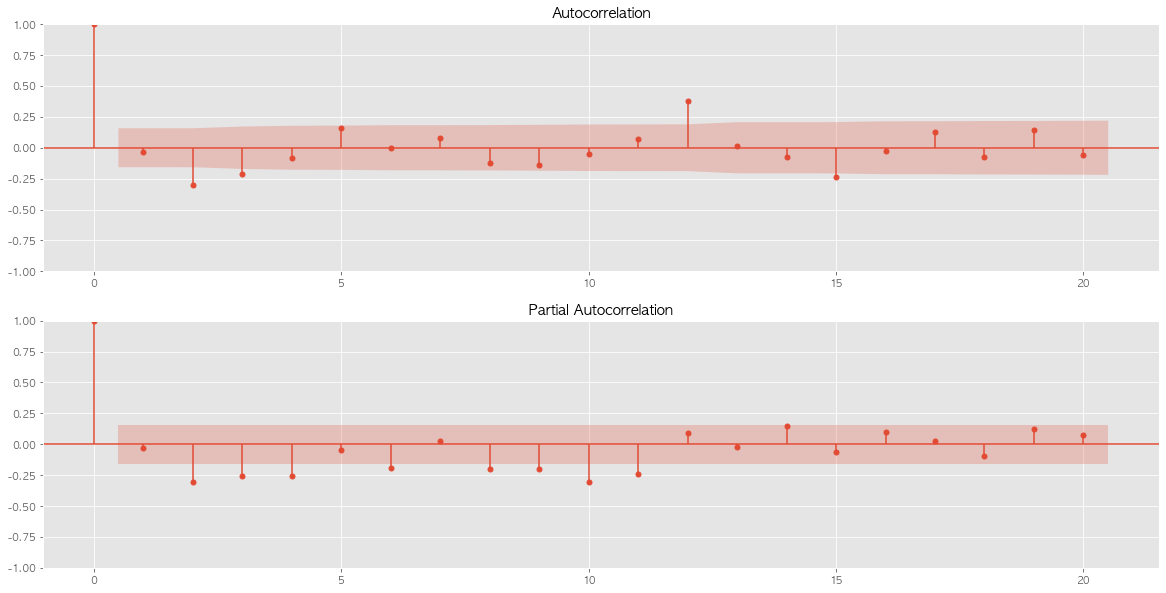

In [61]:
# 정상성을 만족하는 데이터로 ACF와 PACF 그래프를 그려 ARIMA 모형의 p와 q를 결정한다.

import statsmodels.api as sm

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags=20, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags=20, ax=ax2)

/Users/im-yelin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/im-yelin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/im-yelin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/im-yelin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



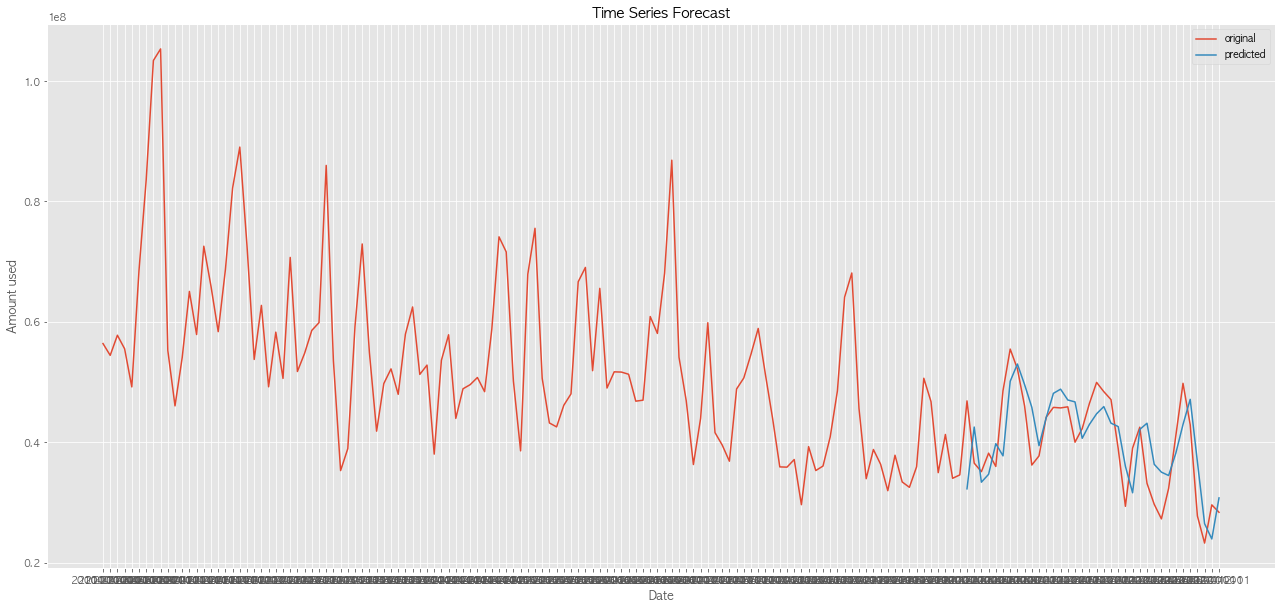

In [62]:
# ARIMA 모델의 결과

from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(4, 1, 5))
model_fit = model.fit()

# predict
start_index = datetime(2020, 1, 1)
end_index = datetime(2022, 12, 1)
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')


# 데이터 형식 맞추기
forecast.index = A05.Date.iloc[-len(forecast):].values

# visualization
plt.figure(figsize=(22, 10))
plt.plot(A05.Date, A05.Amount_used, label = "original")
plt.plot(forecast.index, forecast, label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Amount used")
plt.legend()
plt.show()

In [63]:
timeSeries['Date'] = pd.to_datetime(timeSeries['Date'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


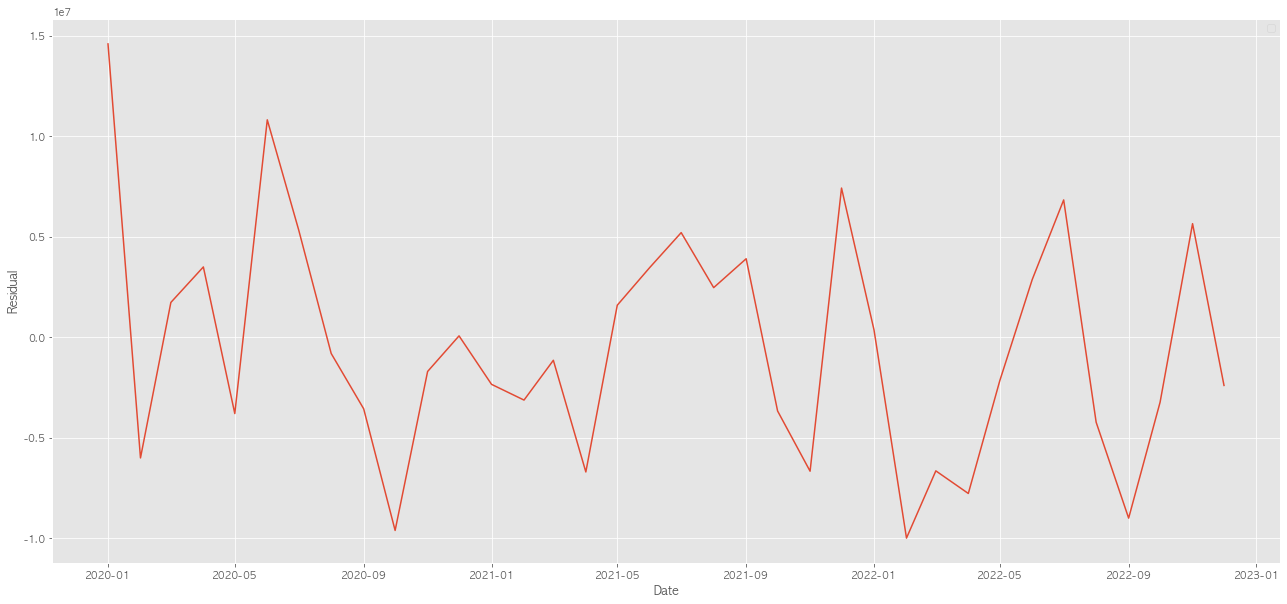

In [64]:
resi = np.array(timeSeries[timeSeries.Date>=start_index].Amount_used) - np.array(forecast)

plt.figure(figsize=(22,10))
plt.plot(timeSeries.Date[timeSeries.Date>=start_index], resi)
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.show()

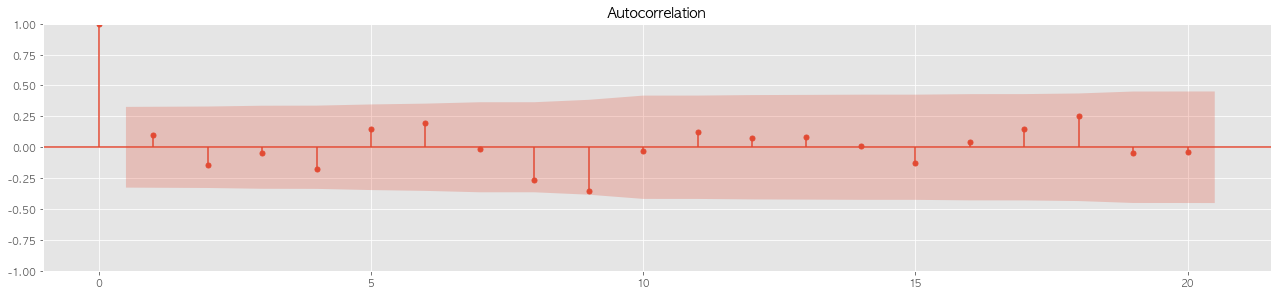

In [65]:
# ACF 그래프 및 ADF 검정을 통해 정상성 판단

fig = plt.figure(figsize=(22,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resi, lags=20, ax=ax1)

In [66]:
result = adfuller(resi)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.346072
p-value: 0.000369
Critical Values
	1%: -3.639
	5%: -2.951
	10%: -2.614


In [67]:
# 마지막 성능 확인

from sklearn import metrics

def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    corr = round(np.corrcoef(y_true, y_pred)[0, 1], 3)
    mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)
    
    df = pd.DataFrame({
        'R2' : r2,
        'Corr' : corr,
        'RMSE' : rmse,
        'MAPE' : mape
    }, index = [0])
    return df

In [68]:
scoring(np.array(timeSeries[timeSeries.Date>=start_index].Amount_used), np.array(forecast))

,R2,Corr,RMSE,MAPE
0,48.158,0.71,5727613.013,12.629


# T61 의약품 가격

In [69]:
T61 = pd.read_excel('T61 2010-2022.xlsx')
T61

,Category,사용금액
0,201001,3121279
1,201002,1188833
2,201003,1481292
3,201004,12501228
4,201005,2459549
...,...,...
151,202208,761678
152,202209,777352
153,202210,3207258
154,202211,3638009


In [70]:
# 'Category' 컬럼의 값을 'yyyy-mm-01' 형식으로 변환
T61['Category'] = pd.to_datetime(T61['Category'], format='%Y%m').dt.strftime('%Y-%m-%d')
T61

,Category,사용금액
0,2010-01-01,3121279
1,2010-02-01,1188833
2,2010-03-01,1481292
3,2010-04-01,12501228
4,2010-05-01,2459549
...,...,...
151,2022-08-01,761678
152,2022-09-01,777352
153,2022-10-01,3207258
154,2022-11-01,3638009


In [71]:
T61.columns = ['Date', 'Amount_used']
T61

,Date,Amount_used
0,2010-01-01,3121279
1,2010-02-01,1188833
2,2010-03-01,1481292
3,2010-04-01,12501228
4,2010-05-01,2459549
...,...,...
151,2022-08-01,761678
152,2022-09-01,777352
153,2022-10-01,3207258
154,2022-11-01,3638009


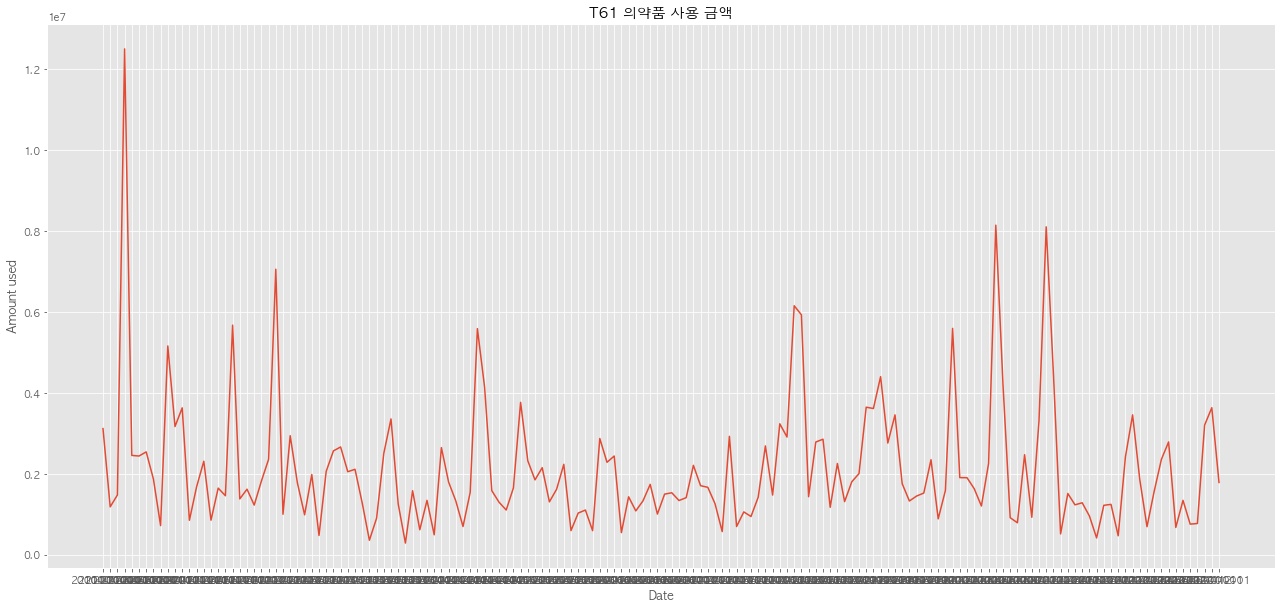

In [72]:
plt.figure(figsize=(22,10))
plt.plot(T61.Date, T61.Amount_used)
plt.title("T61 의약품 사용 금액")
plt.xlabel("Date")
plt.ylabel("Amount used")
plt.show()

In [119]:
timeSeries = T61.loc[:, ["Date", "Amount_used"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date", axis=1)
ts

,Amount_used
Date,
2010-01-01,3121279
2010-02-01,1188833
2010-03-01,1481292
2010-04-01,12501228
2010-05-01,2459549
...,...
2022-08-01,761678
2022-09-01,777352
2022-10-01,3207258


<Figure size 432x288 with 0 Axes>

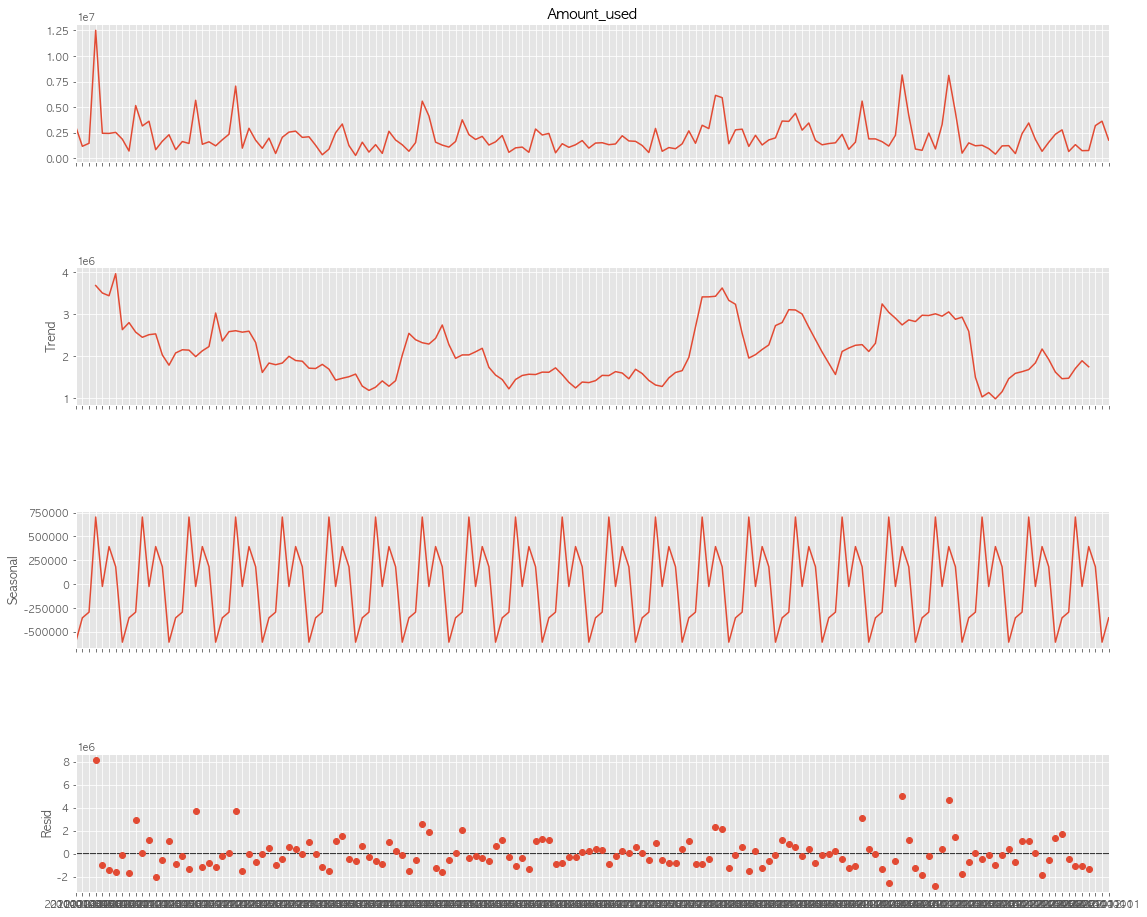

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['Amount_used'], model = 'additive', period = 7)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20, 15)

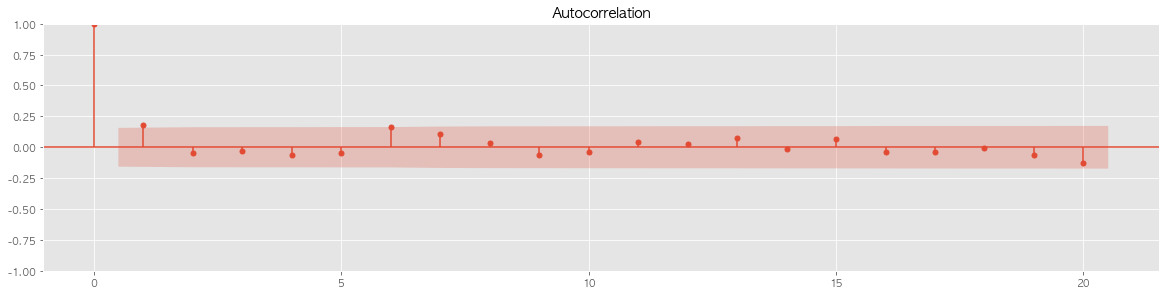

In [121]:
# ACF 그래프

import statsmodels.api as sm

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)

In [122]:
# ADF 검정으로 정상성 확인

from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.540381
p-value: 0.000000
Critical Values
	1%: -3.474
	5%: -2.880
	10%: -2.577


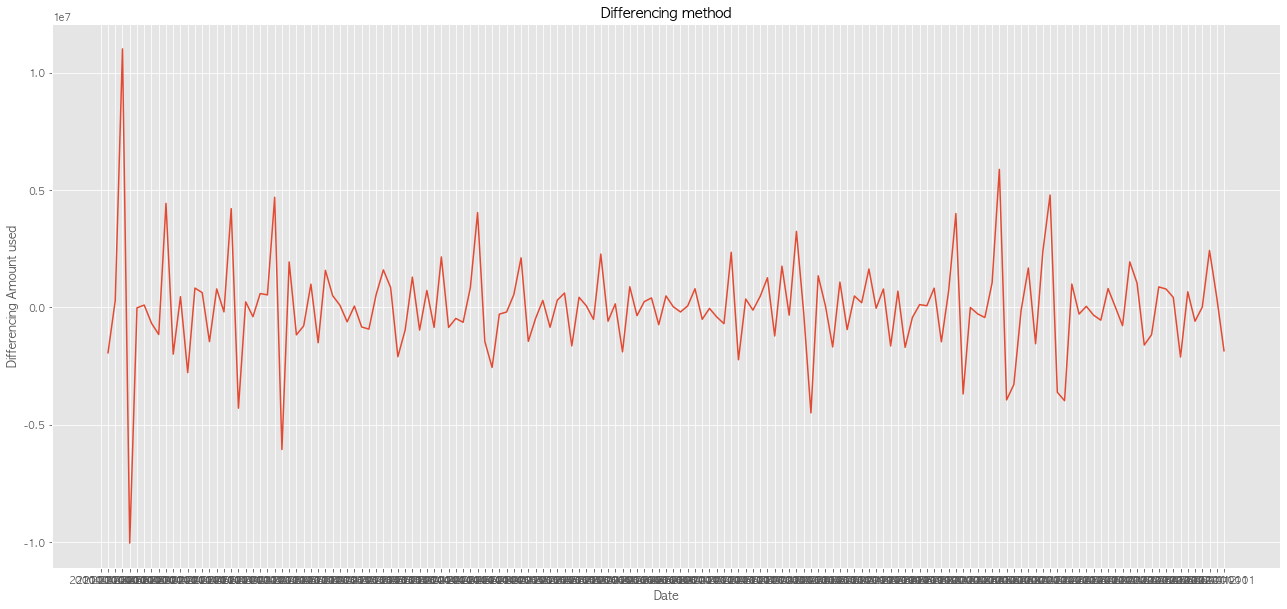

In [125]:

# 1차 차분

ts_diff = ts - ts.shift()
plt.figure(figsize=(22, 10))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Amount used")
plt.show()


In [126]:

# ADF 검정으로 정상성 확인

result = adfuller(ts_diff[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -9.274380
p-value: 0.000000
Critical Values
	1%: -3.475
	5%: -2.881
	10%: -2.577


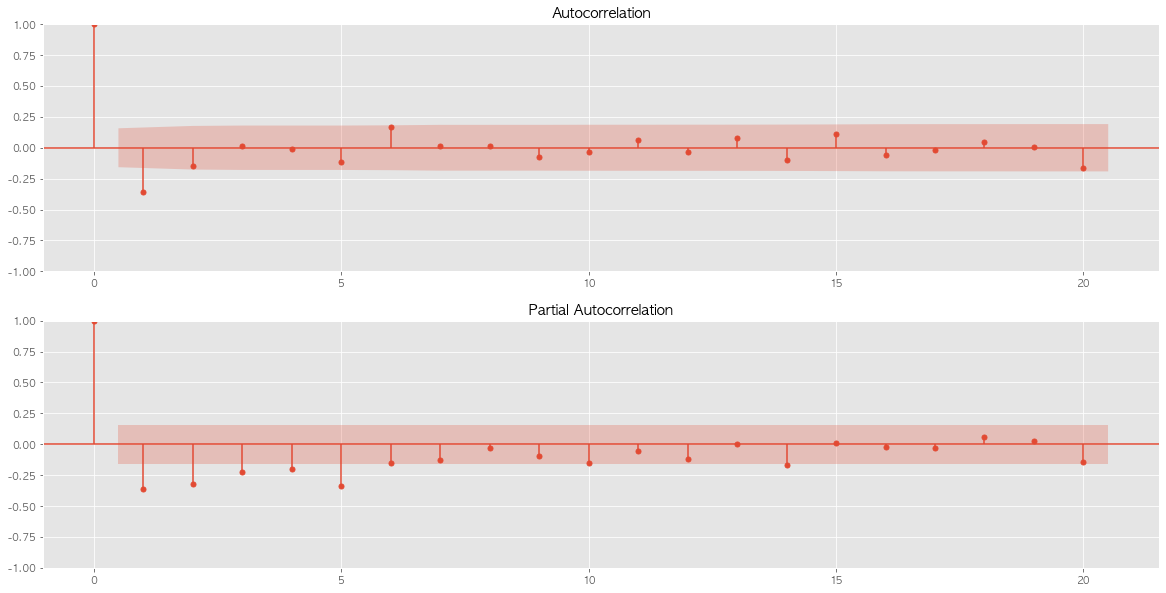

In [127]:
# 정상성을 만족하는 데이터로 ACF와 PACF 그래프를 그려 ARIMA 모형의 p와 q를 결정한다.

import statsmodels.api as sm

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags=20, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags=20, ax=ax2)

/Users/im-yelin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/im-yelin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/im-yelin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/im-yelin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



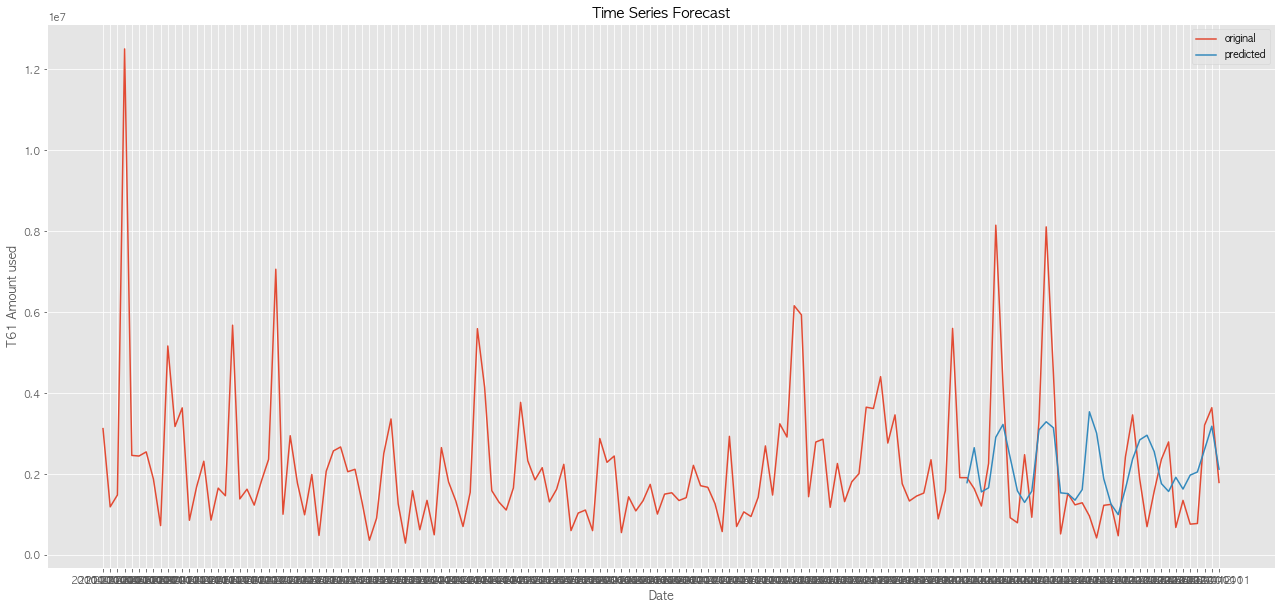

In [128]:
# ARIMA 모델의 결과

from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(3, 1, 8))
model_fit = model.fit()

# predict
start_index = datetime(2020, 1, 1)
end_index = datetime(2022, 12, 1)
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')


# 데이터 형식 맞추기
forecast.index = T61.Date.iloc[-len(forecast):].values

# visualization
plt.figure(figsize=(22, 10))
plt.plot(T61.Date, T61.Amount_used, label = "original")
plt.plot(forecast.index, forecast, label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("T61 Amount used")
plt.legend()
plt.show()

In [129]:
timeSeries['Date'] = pd.to_datetime(timeSeries['Date'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


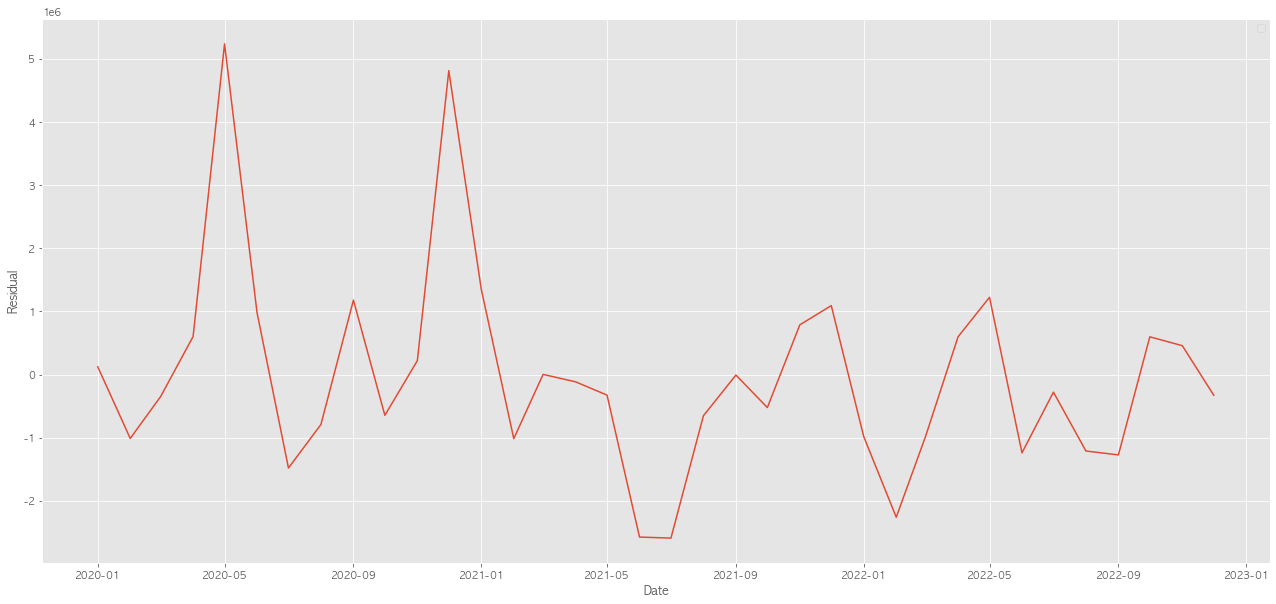

In [130]:
resi = np.array(timeSeries[timeSeries.Date>=start_index].Amount_used) - np.array(forecast)

plt.figure(figsize=(22,10))
plt.plot(timeSeries.Date[timeSeries.Date>=start_index], resi)
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.show()

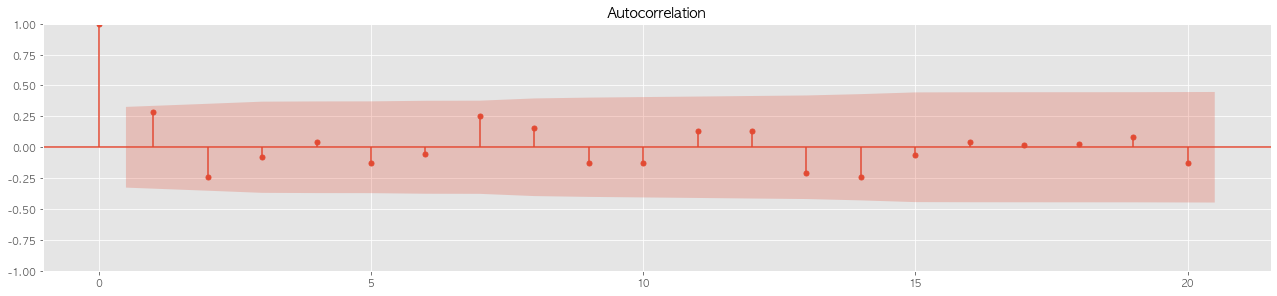

In [131]:
# ACF 그래프 및 ADF 검정을 통해 정상성 판단

fig = plt.figure(figsize=(22,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resi, lags=20, ax=ax1)

In [132]:
result = adfuller(resi)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.837363
p-value: 0.000046
Critical Values
	1%: -3.639
	5%: -2.951
	10%: -2.614


In [133]:
# 마지막 성능 확인

from sklearn import metrics

def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    corr = round(np.corrcoef(y_true, y_pred)[0, 1], 3)
    mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)
    
    df = pd.DataFrame({
        'R2' : r2,
        'Corr' : corr,
        'RMSE' : rmse,
        'MAPE' : mape
    }, index = [0])
    return df

In [134]:
scoring(np.array(timeSeries[timeSeries.Date>=start_index].Amount_used), np.array(forecast))

,R2,Corr,RMSE,MAPE
0,22.319,0.482,1588701.332,86.354


# T78 의약품 가격

In [150]:
T78 = pd.read_excel('T78 2010-2022.xlsx')
T78

,Category,사용금액
0,201001,77640736
1,201002,75477647
2,201003,85038128
3,201004,88930460
4,201005,101073739
...,...,...
151,202208,495302437
152,202209,465947809
153,202210,416668623
154,202211,421163846


In [151]:
# 'Category' 컬럼의 값을 'yyyy-mm-01' 형식으로 변환
T78['Category'] = pd.to_datetime(T78['Category'], format='%Y%m').dt.strftime('%Y-%m-%d')
T78

,Category,사용금액
0,2010-01-01,77640736
1,2010-02-01,75477647
2,2010-03-01,85038128
3,2010-04-01,88930460
4,2010-05-01,101073739
...,...,...
151,2022-08-01,495302437
152,2022-09-01,465947809
153,2022-10-01,416668623
154,2022-11-01,421163846


In [152]:
T78.columns = ['Date', 'Amount_used']
T78

,Date,Amount_used
0,2010-01-01,77640736
1,2010-02-01,75477647
2,2010-03-01,85038128
3,2010-04-01,88930460
4,2010-05-01,101073739
...,...,...
151,2022-08-01,495302437
152,2022-09-01,465947809
153,2022-10-01,416668623
154,2022-11-01,421163846


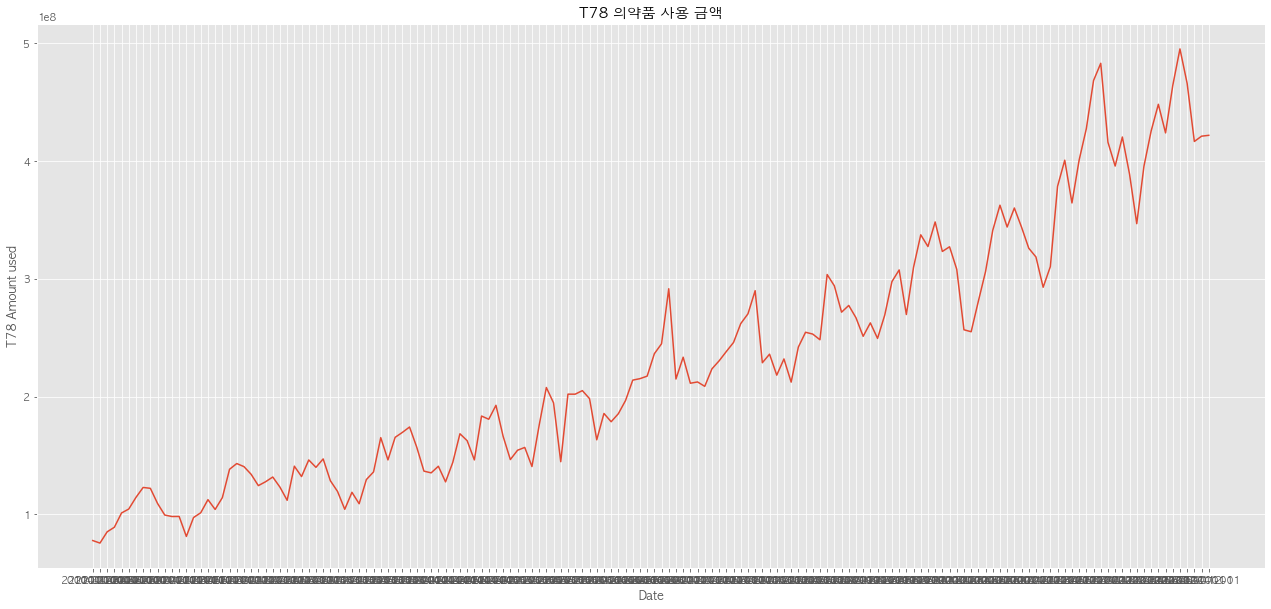

In [153]:
plt.figure(figsize=(22,10))
plt.plot(T78.Date, T78.Amount_used)
plt.title("T78 의약품 사용 금액")
plt.xlabel("Date")
plt.ylabel("T78 Amount used")
plt.show()

In [154]:
timeSeries = T78.loc[:, ["Date", "Amount_used"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date", axis=1)
ts

,Amount_used
Date,
2010-01-01,77640736
2010-02-01,75477647
2010-03-01,85038128
2010-04-01,88930460
2010-05-01,101073739
...,...
2022-08-01,495302437
2022-09-01,465947809
2022-10-01,416668623


<Figure size 432x288 with 0 Axes>

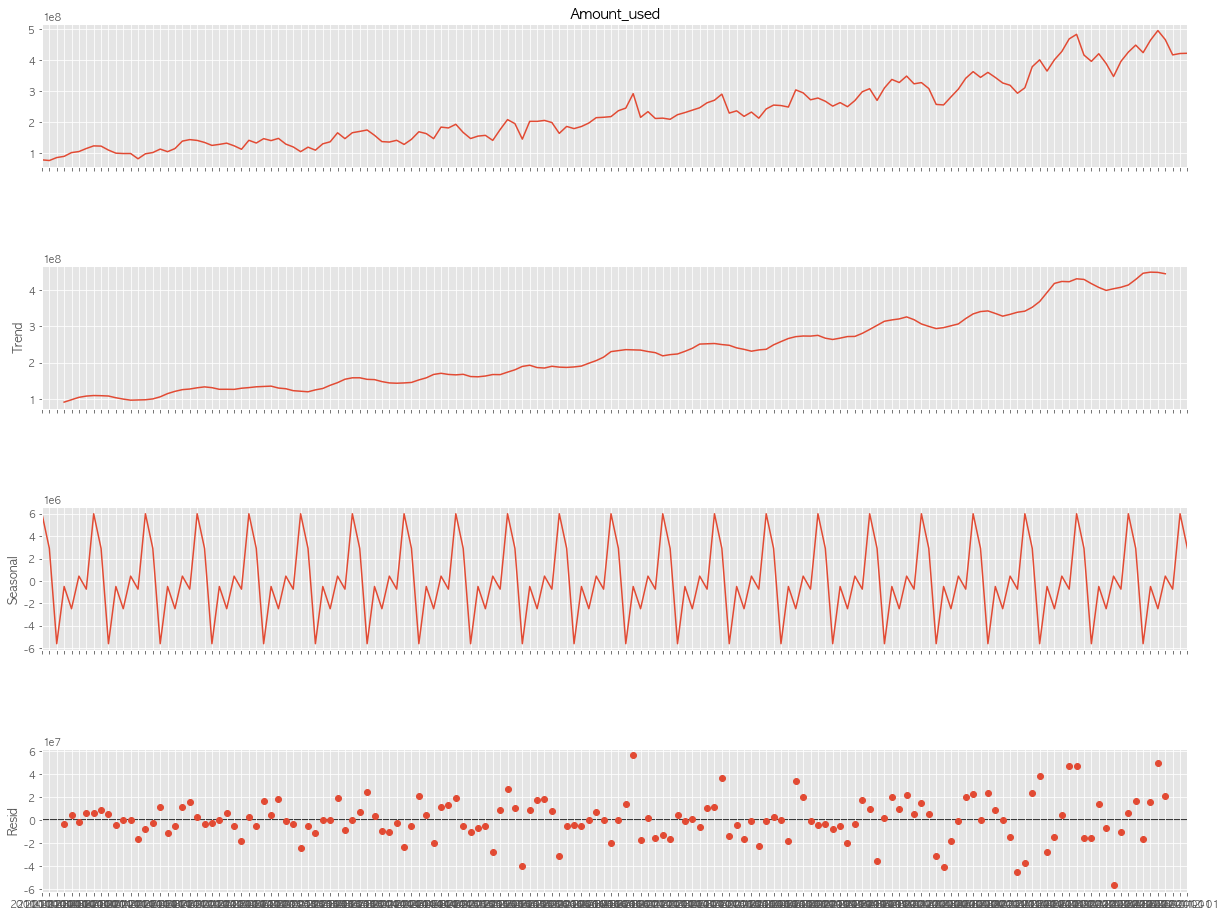

In [155]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['Amount_used'], model = 'additive', period = 7)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20, 15)

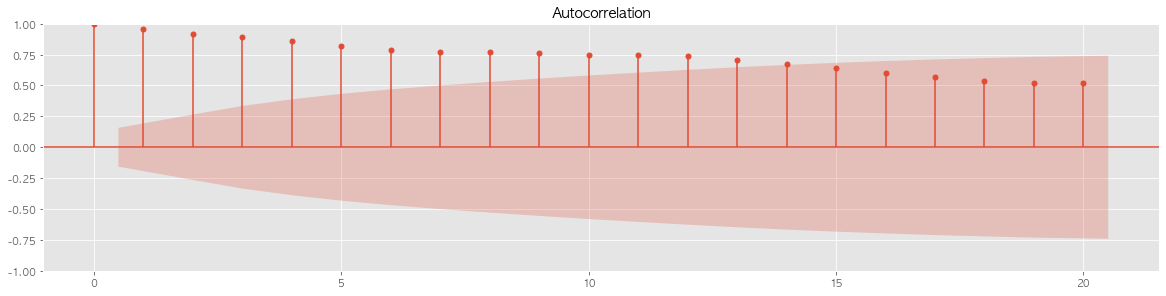

In [156]:
# ACF 그래프

import statsmodels.api as sm

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)

In [157]:
# ADF 검정으로 정상성 확인

from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.318657
p-value: 0.996711
Critical Values
	1%: -3.478
	5%: -2.882
	10%: -2.578


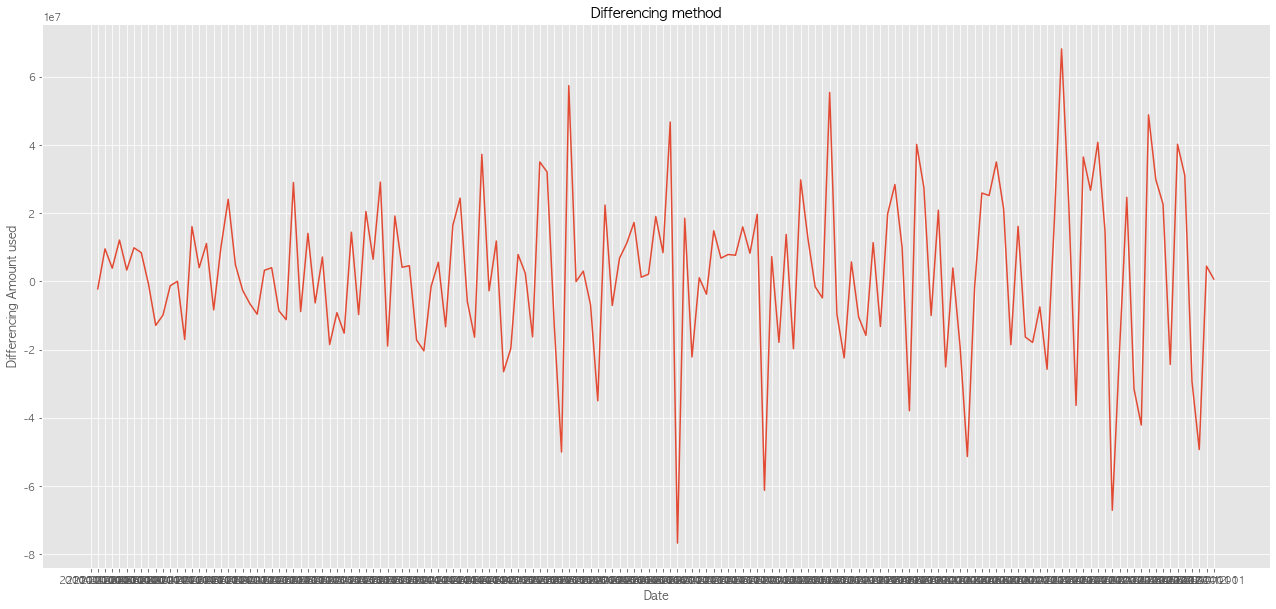

In [158]:
# 1차 차분

ts_diff = ts - ts.shift()
plt.figure(figsize=(22, 10))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Amount used")
plt.show()

In [159]:
# ADF 검정으로 정상성 확인

result = adfuller(ts_diff[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.615911
p-value: 0.005464
Critical Values
	1%: -3.478
	5%: -2.882
	10%: -2.578


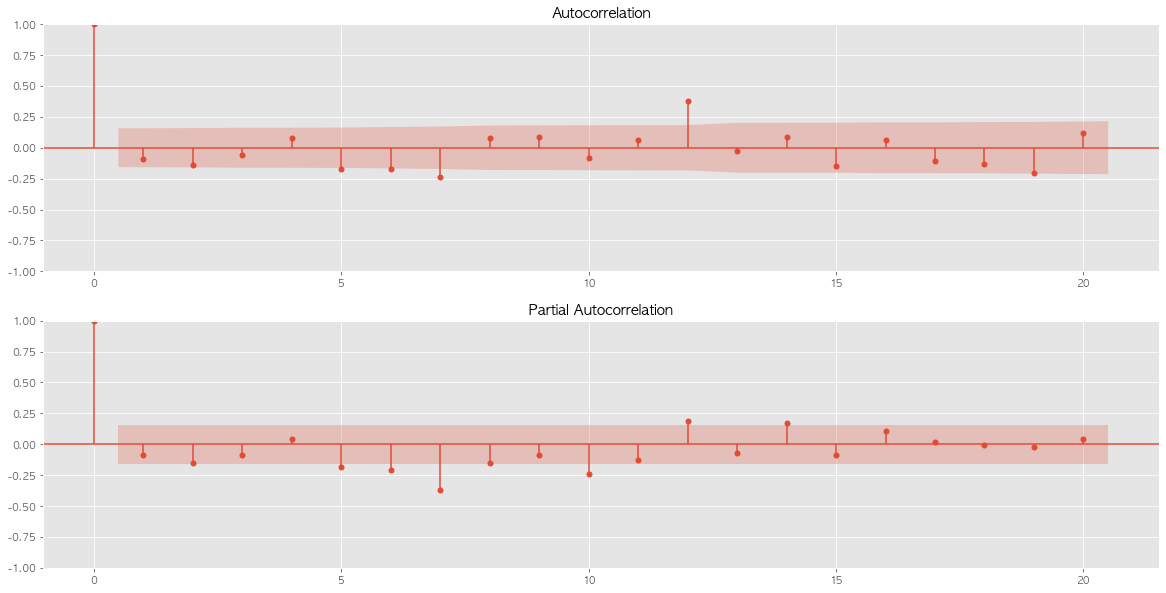

In [160]:
# 정상성을 만족하는 데이터로 ACF와 PACF 그래프를 그려 ARIMA 모형의 p와 q를 결정한다.

import statsmodels.api as sm

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags=20, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags=20, ax=ax2)

/Users/im-yelin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/im-yelin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/im-yelin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



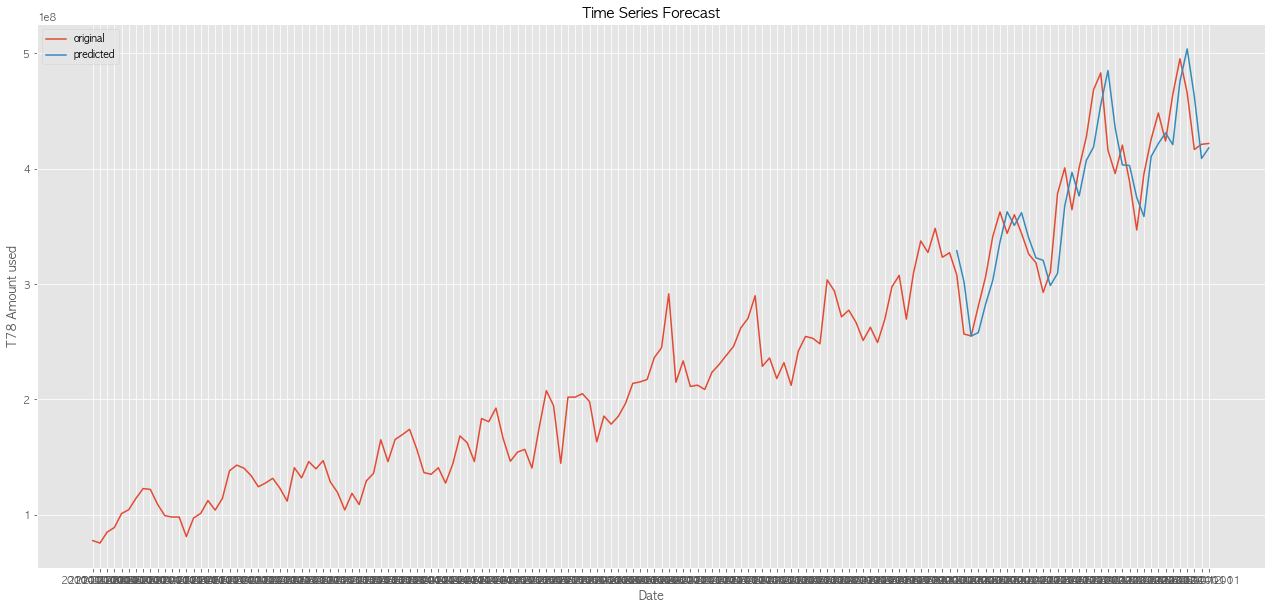

In [162]:
# ARIMA 모델의 결과

from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(2, 1, 2))
model_fit = model.fit()

# predict
start_index = datetime(2020, 1, 1)
end_index = datetime(2022, 12, 1)
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')


# 데이터 형식 맞추기
forecast.index = T78.Date.iloc[-len(forecast):].values

# visualization
plt.figure(figsize=(22, 10))
plt.plot(T78.Date, T78.Amount_used, label = "original")
plt.plot(forecast.index, forecast, label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("T78 Amount used")
plt.legend()
plt.show()

In [163]:
timeSeries['Date'] = pd.to_datetime(timeSeries['Date'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


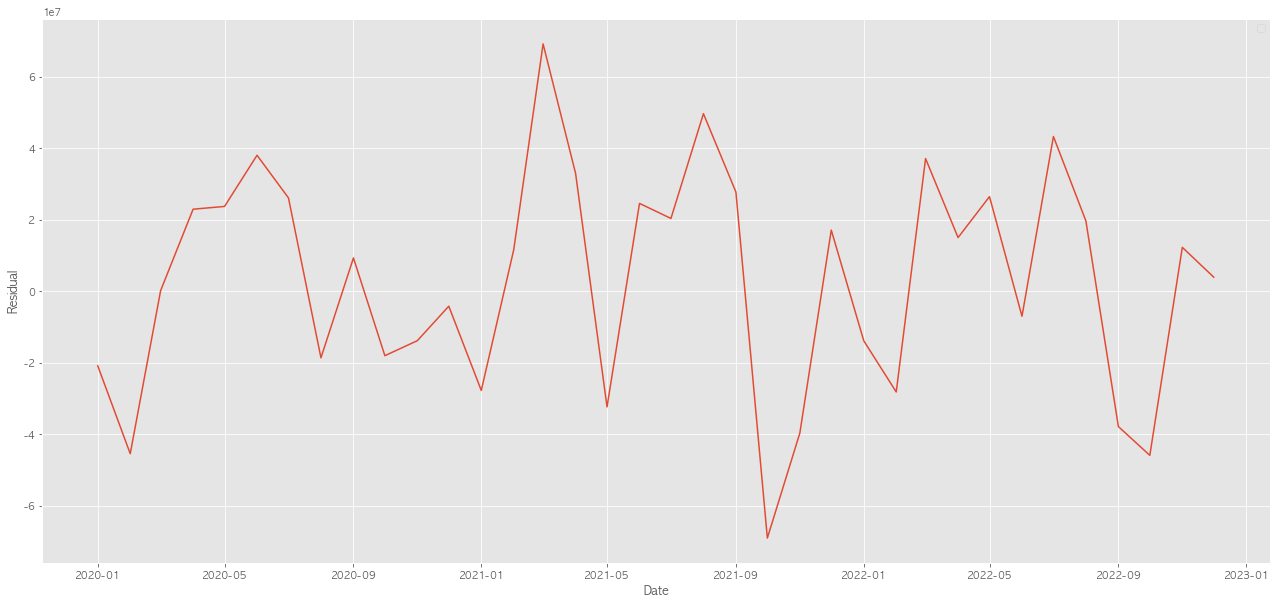

In [164]:
resi = np.array(timeSeries[timeSeries.Date>=start_index].Amount_used) - np.array(forecast)

plt.figure(figsize=(22,10))
plt.plot(timeSeries.Date[timeSeries.Date>=start_index], resi)
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.show()

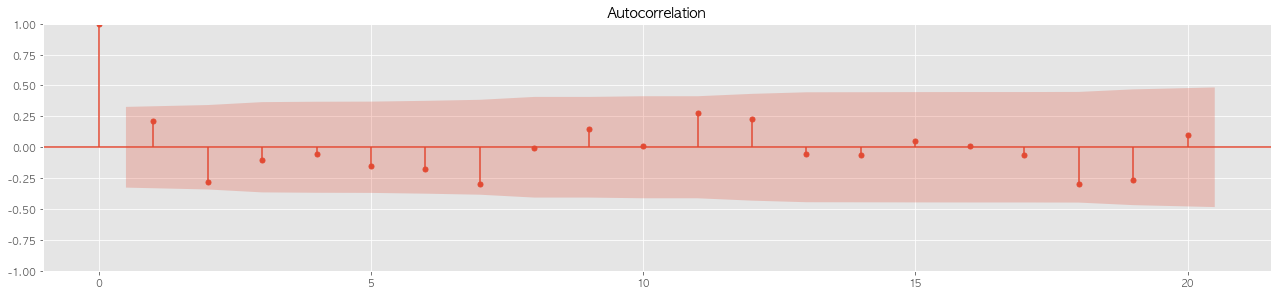

In [165]:
# ACF 그래프 및 ADF 검정을 통해 정상성 판단

fig = plt.figure(figsize=(22,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resi, lags=20, ax=ax1)

In [166]:
result = adfuller(resi)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.309825
p-value: 0.000005
Critical Values
	1%: -3.639
	5%: -2.951
	10%: -2.614


In [167]:
# 마지막 성능 확인

from sklearn import metrics

def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    corr = round(np.corrcoef(y_true, y_pred)[0, 1], 3)
    mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)
    
    df = pd.DataFrame({
        'R2' : r2,
        'Corr' : corr,
        'RMSE' : rmse,
        'MAPE' : mape
    }, index = [0])
    return df

In [168]:
scoring(np.array(timeSeries[timeSeries.Date>=start_index].Amount_used), np.array(forecast))

,R2,Corr,RMSE,MAPE
0,75.68,0.879,3.106843e+07,7.02
